In [1]:
## Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ananya2208","key":"c86bd0c523ddc83b46d9c96b253c9bc0"}'}

In [ ]:
#creating a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all datasets in kaggle
!kaggle datasets list

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:25<00:00, 148MB/s]
100% 2.70G/2.70G [00:25<00:00, 112MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip -d ./train


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'plant/plant_train/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [7]:
# valid image pre procesing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'plant/plant_train/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
##buliding model
## step 1 importing imp libraries
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
cnn = tf.keras.models.Sequential()

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# training model
training_accuracy=cnn.fit(x=training_set,validation_data=validation_set,epochs=2)

Epoch 1/2
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 10710s 2s/step - accuracy: 0.4329 - loss: 2.0048 - val_accuracy: 0.7985 - val_loss: 0.6396
Epoch 2/2
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 10687s 2s/step - accuracy: 0.8483 - loss: 0.4863 - val_accuracy: 0.9029 - val_loss: 0.3037


In [22]:
#model evaluation on training set
tain_loss,train_accuracy=cnn.evaluate(training_set)

4394/4394 ━━━━━━━━━━━━━━━━━━━━ 2707s 616ms/step - accuracy: 0.9144 - loss: 0.2629


In [23]:
print("Training Accuracy is {}".format(train_accuracy))
print("Training Loss is {}".format(tain_loss))

Training Accuracy is 0.9228963851928711
Training Loss is 0.2393878549337387


In [24]:
#model on validation set
val_loss,val_accuracy=cnn.evaluate(validation_set)

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 708s 645ms/step - accuracy: 0.9063 - loss: 0.2924


In [25]:
print("Validation Accuracy is {}".format(val_accuracy))
print("Validation Loss is {}".format(val_loss))

Validation Accuracy is 0.9029137492179871
Validation Loss is 0.3036651015281677


In [26]:
# saving model
cnn.save("plant_trained.keras")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
training_accuracy.history


{'accuracy': [0.632164478302002, 0.8703891038894653],
 'loss': [1.2434606552124023, 0.40822240710258484],
 'val_accuracy': [0.7984862327575684, 0.9029137492179871],
 'val_loss': [0.6395917534828186, 0.30366504192352295]}

In [28]:
#recording history in json
import json
with open("plant_train_history.json","w") as f:
  json.dump(training_accuracy.history,f)


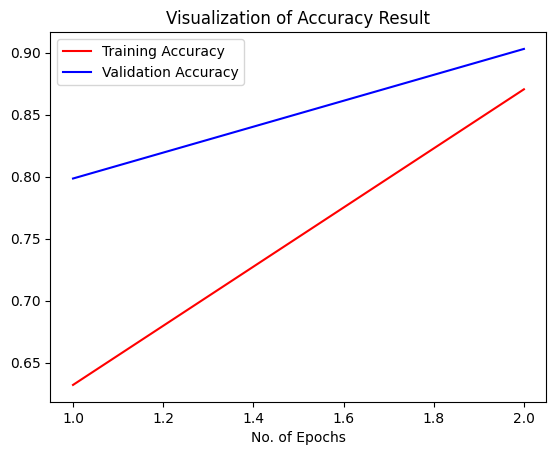

In [29]:
#accuracy visualization
epochs = [i for i in range(1,3)]
plt.plot(epochs,training_accuracy.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_accuracy.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [30]:
#some other metrics for model visualization
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'plant/plant_train/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred=cnn.predict(test_set)
y_pred,y_pred.shape

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 667s 607ms/step


(array([[9.9976754e-01, 1.1262270e-07, 7.0550179e-08, ..., 2.8695733e-11,
         7.5548408e-11, 1.3982537e-08],
        [9.9994892e-01, 4.6947562e-06, 1.3862326e-08, ..., 1.9264416e-11,
         7.7312726e-11, 1.3885587e-08],
        [9.9999994e-01, 1.3862239e-12, 3.4636519e-10, ..., 1.3333376e-15,
         1.1383159e-13, 6.2464228e-10],
        ...,
        [4.3287800e-09, 4.0461809e-12, 1.7429609e-09, ..., 6.2388962e-11,
         1.7013541e-10, 9.9999833e-01],
        [8.9629644e-08, 8.1868325e-11, 2.5173369e-08, ..., 9.7972448e-09,
         1.6884256e-09, 9.9998593e-01],
        [1.3168810e-12, 1.2237966e-14, 1.8266481e-13, ..., 9.9590399e-15,
         1.7849755e-11, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
#printing recall precision f1_score for each class
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.82      0.86       504
                                 Apple___Black_rot       0.99      0.92      0.95       497
                          Apple___Cedar_apple_rust       0.96      0.90      0.93       440
                                   Apple___healthy       0.81      0.93      0.86       502
                               Blueberry___healthy       0.94      0.92      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.94      0.94       421
                 Cherry_(including_sour)___healthy       0.90      0.95      0.92       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.84      0.89       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.97      0.

In [38]:
cm = confusion_matrix(Y_true,predicted_categories)


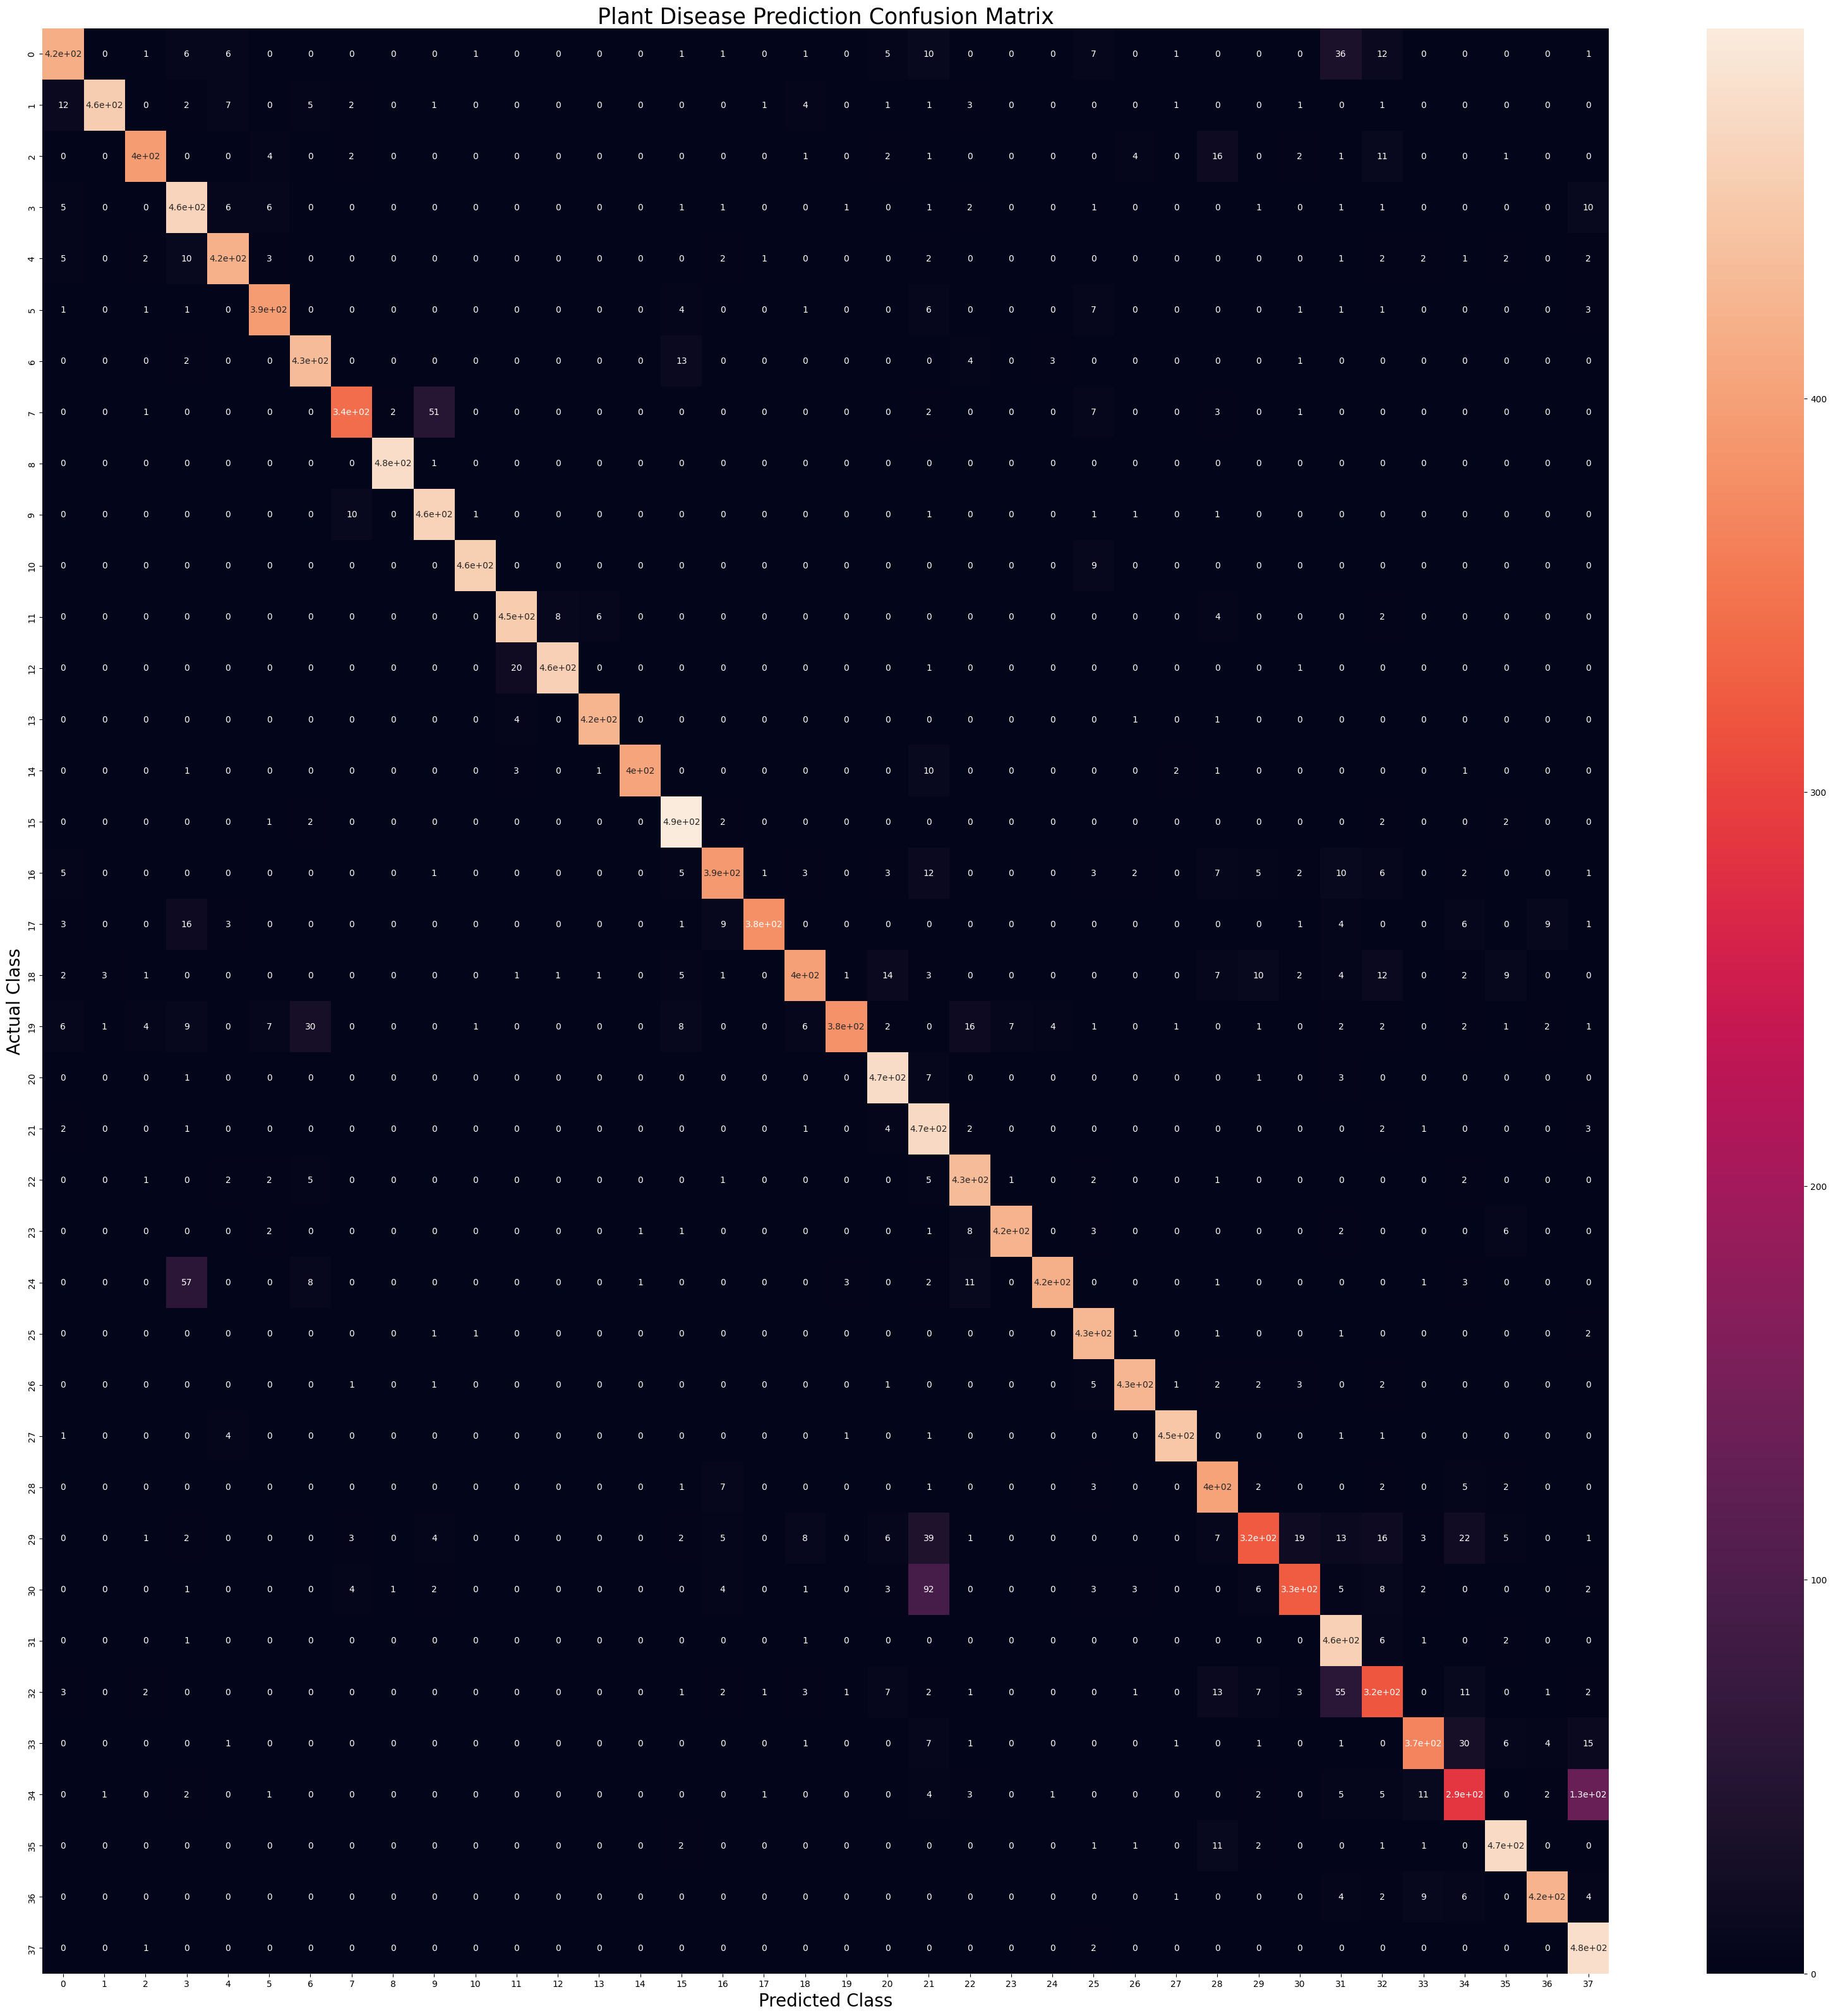

In [39]:
#confusion matrix visualization
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()